In [300]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Save figures created

In [301]:
IMAGES_PATH = Path() / 'images'
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [302]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Loading Dataset

In [303]:
from sklearn.datasets import fetch_openml

boston_housing_data = fetch_openml(data_id=43465, as_frame='auto', return_X_y=True)
boston_housing_df = boston_housing_data[0]
boston_housing_target = boston_housing_data[1]
boston_housing = boston_housing_df.copy()
boston_housing['MEDV'] = boston_housing_target
display(boston_housing_df)
print(boston_housing_target)
display(boston_housing)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### EDA

In [304]:
boston_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [305]:
boston_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [306]:
boston_housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [307]:
boston_housing['ZN'].value_counts()

ZN
0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: count, dtype: int64

In [308]:
boston_housing['CHAS'].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

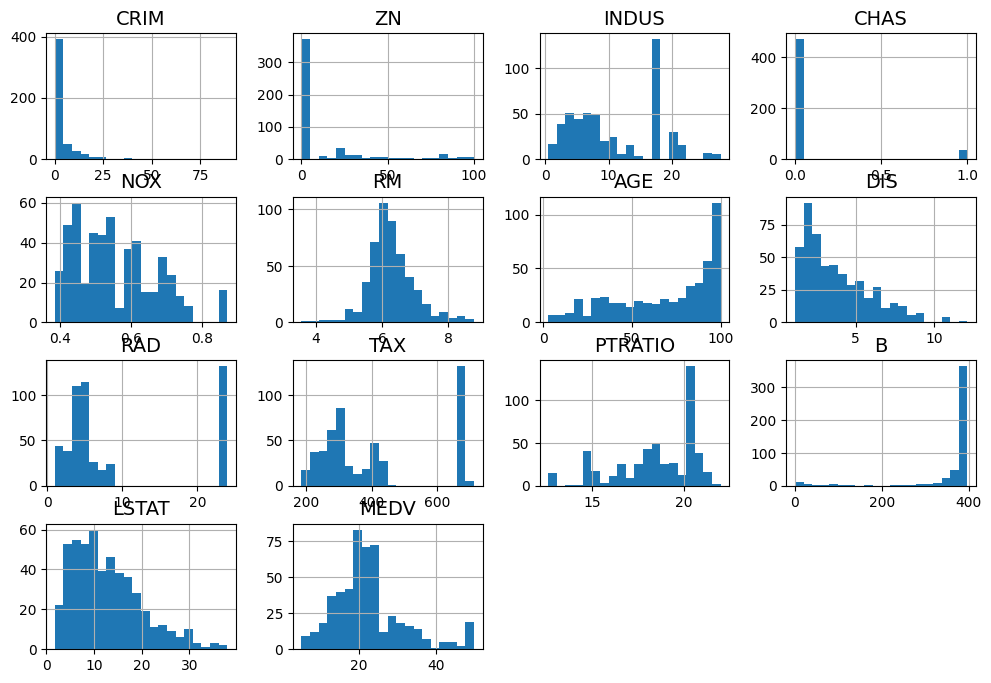

In [309]:
boston_housing.hist(bins=20, figsize=(12, 8))

In [310]:
boston_housing['TAX'].value_counts()

TAX
666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
        ... 
285.0      1
198.0      1
256.0      1
244.0      1
313.0      1
Name: count, Length: 66, dtype: int64

In [311]:
corr_matrix = boston_housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='INDUS', ylabel='MEDV'>,
        <Axes: xlabel='PTRATIO', ylabel='MEDV'>,
        <Axes: xlabel='TAX', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='INDUS'>,
        <Axes: xlabel='INDUS', ylabel='INDUS'>,
        <Axes: xlabel='PTRATIO', ylabel='INDUS'>,
        <Axes: xlabel='TAX', ylabel='INDUS'>],
       [<Axes: xlabel='MEDV', ylabel='PTRATIO'>,
        <Axes: xlabel='INDUS', ylabel='PTRATIO'>,
        <Axes: xlabel='PTRATIO', ylabel='PTRATIO'>,
        <Axes: xlabel='TAX', ylabel='PTRATIO'>],
       [<Axes: xlabel='MEDV', ylabel='TAX'>,
        <Axes: xlabel='INDUS', ylabel='TAX'>,
        <Axes: xlabel='PTRATIO', ylabel='TAX'>,
        <Axes: xlabel='TAX', ylabel='TAX'>]], dtype=object)

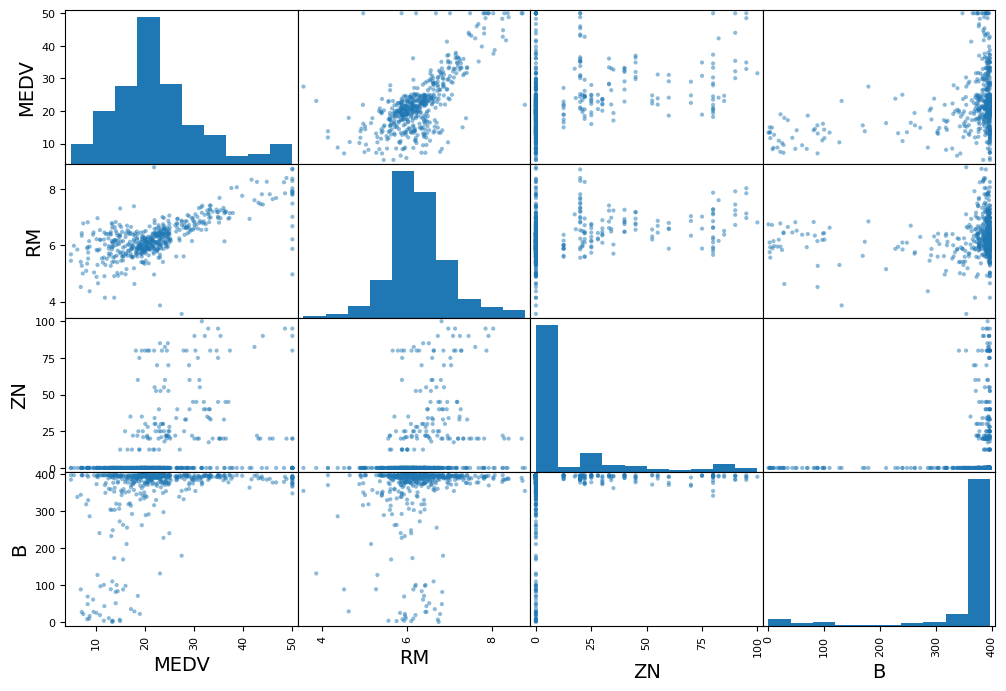

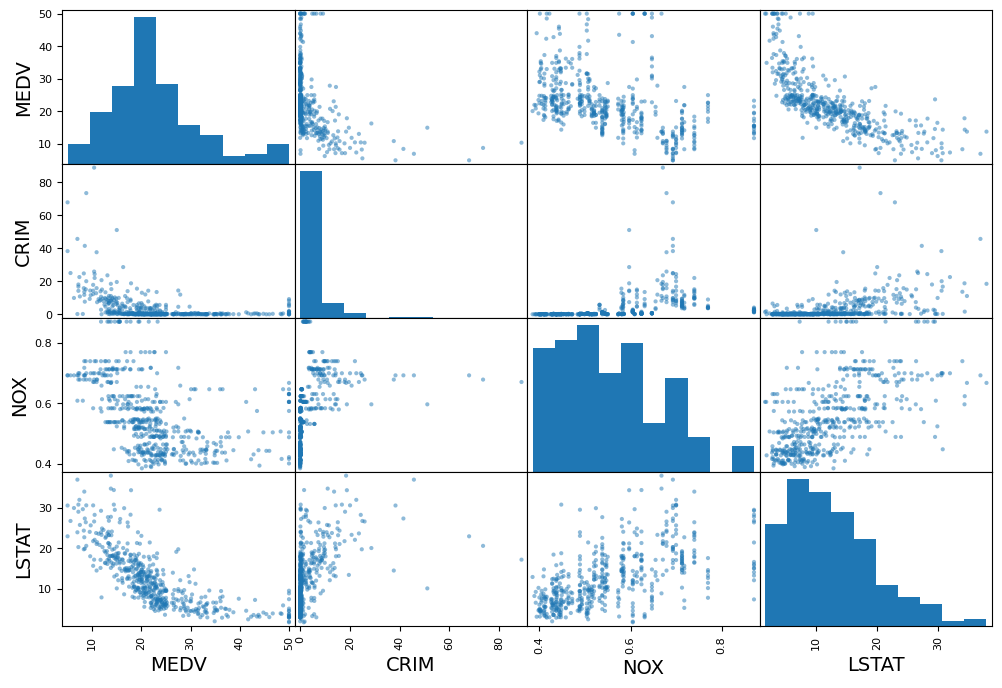

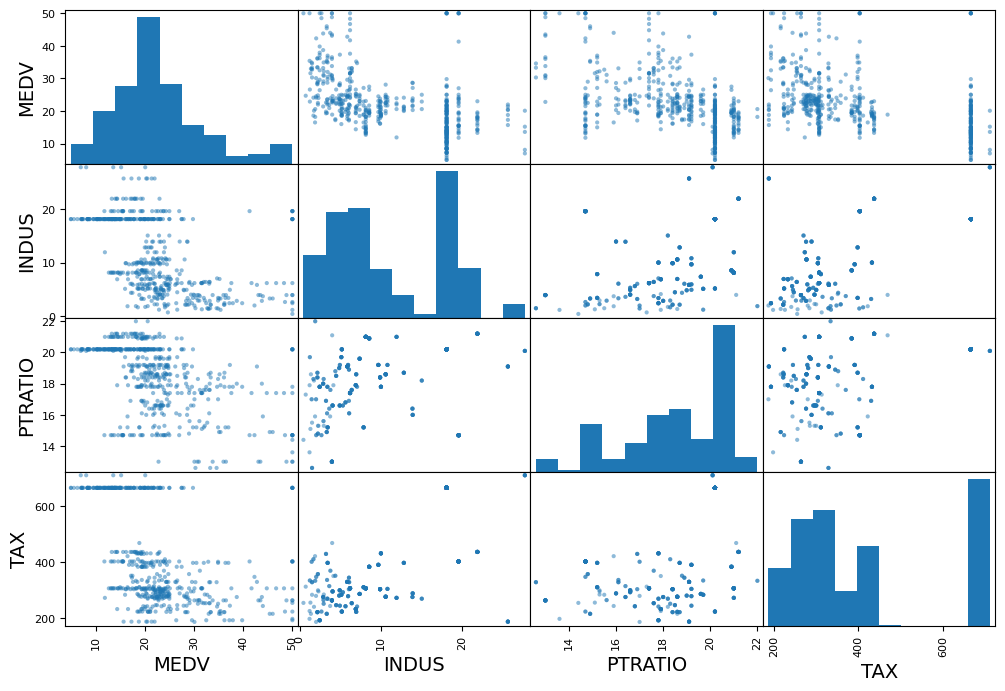

In [312]:
from pandas.plotting import scatter_matrix

attributes_1 = ['MEDV', 'RM', 'ZN', 'B']
attributes_2 = ['MEDV', 'CRIM', 'NOX', 'LSTAT']
attributes_3 = ['MEDV', 'INDUS', 'PTRATIO', 'TAX']

scatter_matrix(boston_housing[attributes_1], figsize=(12, 8))
scatter_matrix(boston_housing[attributes_2], figsize=(12, 8))
scatter_matrix(boston_housing[attributes_3], figsize=(12, 8))

<Axes: xlabel='MEDV', ylabel='RM'>

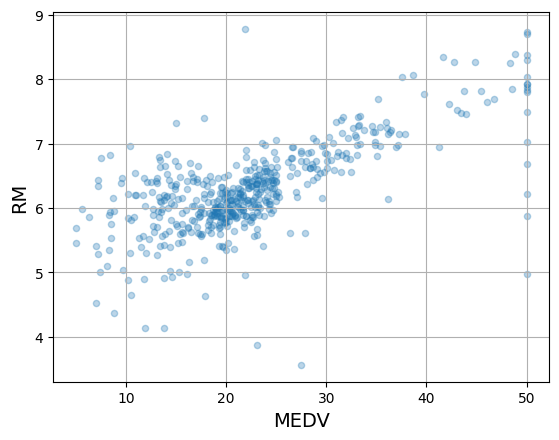

In [313]:
boston_housing.plot(kind='scatter', x='MEDV', y='RM', alpha=0.3, grid=True)

<Axes: xlabel='MEDV', ylabel='LSTAT'>

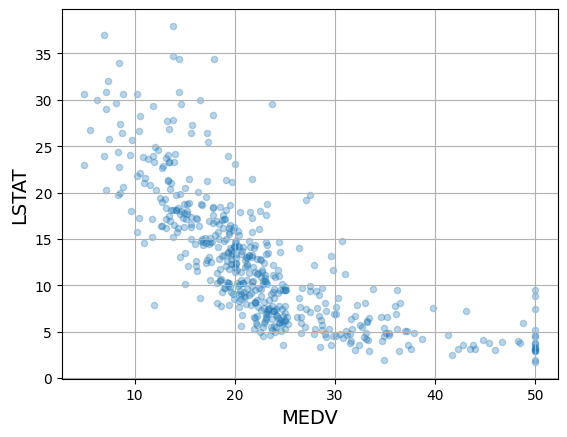

In [314]:
boston_housing.plot(kind='scatter', x='MEDV', y='LSTAT', alpha=0.3, grid=True)

### Transforming Skewed Data

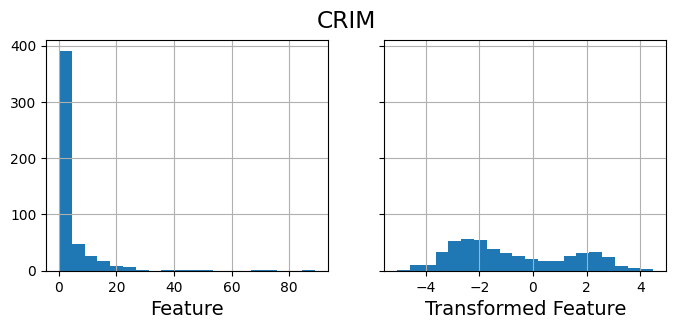

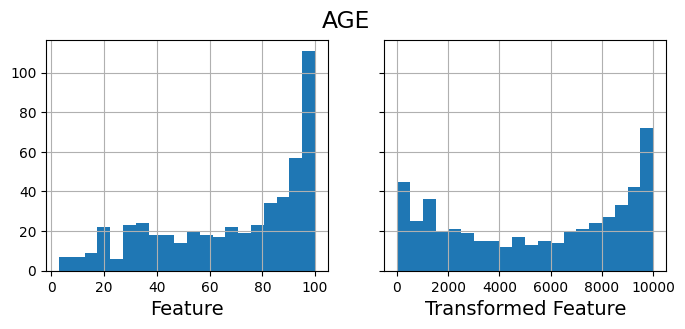

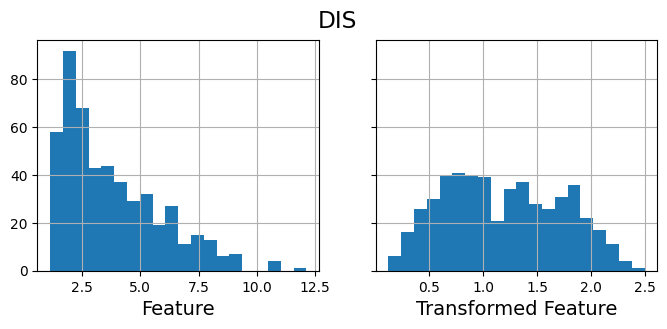

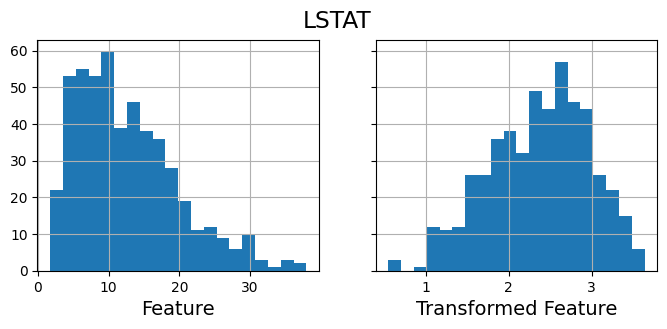

In [315]:
def transform_heavy_tail(feature, right_tailed=True):
    if right_tailed:
        feature = feature.apply(np.log)
    else:
        feature = feature.apply(lambda x: x ** 2)

    return feature

def show_heavy_tail_transform(feature, transformed_feature, title):
    fig, axs = plt.subplots(1,2, figsize=(8, 3), sharey=True)
    feature.hist(ax=axs[0], bins=20)
    transformed_feature.hist(ax=axs[1], bins=20)
    axs[0].set_xlabel('Feature')
    axs[1].set_xlabel('Transformed Feature')
    fig.suptitle(title)
    plt.show()

boston_housing_transformed = boston_housing_df.copy()
boston_housing_transformed['CRIM'] = transform_heavy_tail(boston_housing_transformed['CRIM'])
show_heavy_tail_transform(boston_housing['CRIM'], boston_housing_transformed['CRIM'], 'CRIM')
boston_housing_transformed['AGE'] = transform_heavy_tail(boston_housing_transformed['AGE'], False)
show_heavy_tail_transform(boston_housing['AGE'], boston_housing_transformed['AGE'], 'AGE')
boston_housing_transformed['DIS'] = transform_heavy_tail(boston_housing_transformed['DIS'])
show_heavy_tail_transform(boston_housing['DIS'], boston_housing_transformed['DIS'], 'DIS')
boston_housing_transformed['LSTAT'] = transform_heavy_tail(boston_housing_transformed['LSTAT'])
show_heavy_tail_transform(boston_housing['LSTAT'], boston_housing_transformed['LSTAT'], 'LSTAT')

### Removing higly correlated features

In [316]:
def find_correlated_features(corr_matrix, threshold=0.8):
    pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

    return pairs

high_corr_pairs = find_correlated_features(corr_matrix)
print('Highly correlated features')
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")

Highly correlated features
RAD - TAX : 0.9102281885331865


In [317]:
corr1 = boston_housing_transformed['TAX'].corr(boston_housing_target)
corr2 = boston_housing_transformed['RAD'].corr(boston_housing_target)
print(corr1, corr2)

-0.468535933567767 -0.38162623063977763


In [318]:
boston_housing_transformed = boston_housing_transformed.drop(columns=['RAD'])
display(boston_housing_transformed)
display(boston_housing_df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-5.064036,18.0,2.31,0.0,0.538,6.575,4251.04,1.408545,296.0,15.3,396.90,1.605430
1,-3.600502,0.0,7.07,0.0,0.469,6.421,6225.21,1.602836,242.0,17.8,396.90,2.212660
2,-3.601235,0.0,7.07,0.0,0.469,7.185,3733.21,1.602836,242.0,17.8,392.83,1.393766
3,-3.430523,0.0,2.18,0.0,0.458,6.998,2097.64,1.802073,222.0,18.7,394.63,1.078410
4,-2.672924,0.0,2.18,0.0,0.458,7.147,2937.64,1.802073,222.0,18.7,396.90,1.673351
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0.0,0.573,6.593,4774.81,0.907694,273.0,21.0,391.99,2.269028
502,-3.095111,0.0,11.93,0.0,0.573,6.120,5882.89,0.827460,273.0,21.0,396.90,2.206074
503,-2.800824,0.0,11.93,0.0,0.573,6.976,8281.00,0.773574,273.0,21.0,396.90,1.729884
504,-2.211009,0.0,11.93,0.0,0.573,6.794,7974.49,0.870833,273.0,21.0,393.45,1.868721


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### Standardizing the data

In [319]:
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

set_config(transform_output='pandas')

std_scaler = StandardScaler()
boston_housing_numeric_scaled = std_scaler.fit_transform(boston_housing_transformed.loc[:, ~boston_housing_transformed.columns.isin(['CHAS'])])
boston_housing_scaled = boston_housing_numeric_scaled.copy()
boston_housing_scaled['CHAS'] = boston_housing_transformed['CHAS']
display(boston_housing_transformed)
display(boston_housing_scaled)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-5.064036,18.0,2.31,0.0,0.538,6.575,4251.04,1.408545,296.0,15.3,396.90,1.605430
1,-3.600502,0.0,7.07,0.0,0.469,6.421,6225.21,1.602836,242.0,17.8,396.90,2.212660
2,-3.601235,0.0,7.07,0.0,0.469,7.185,3733.21,1.602836,242.0,17.8,392.83,1.393766
3,-3.430523,0.0,2.18,0.0,0.458,6.998,2097.64,1.802073,222.0,18.7,394.63,1.078410
4,-2.672924,0.0,2.18,0.0,0.458,7.147,2937.64,1.802073,222.0,18.7,396.90,1.673351
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0.0,0.573,6.593,4774.81,0.907694,273.0,21.0,391.99,2.269028
502,-3.095111,0.0,11.93,0.0,0.573,6.120,5882.89,0.827460,273.0,21.0,396.90,2.206074
503,-2.800824,0.0,11.93,0.0,0.573,6.976,8281.00,0.773574,273.0,21.0,396.90,1.729884
504,-2.211009,0.0,11.93,0.0,0.573,6.794,7974.49,0.870833,273.0,21.0,393.45,1.868721


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CHAS
0,-1.983228,0.284830,-1.287909,-0.144217,0.413672,-0.360476,0.409104,-0.666608,-1.459000,0.441052,-1.275260,0.0
1,-1.305639,-0.487722,-0.593381,-0.740262,0.194274,0.212380,0.769562,-0.987329,-0.303094,0.441052,-0.263711,0.0
2,-1.305978,-0.487722,-0.593381,-0.740262,1.282714,-0.510738,0.769562,-0.987329,-0.303094,0.396427,-1.627858,0.0
3,-1.226942,-0.487722,-1.306878,-0.835284,1.016303,-0.985340,1.139194,-1.106115,0.113032,0.416163,-2.153192,0.0
4,-0.876187,-0.487722,-1.306878,-0.835284,1.228577,-0.741593,1.139194,-1.106115,0.113032,0.441052,-1.162114,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.921368,-0.487722,0.115738,0.158124,0.439316,-0.208491,-0.520096,-0.803212,1.176466,0.387217,-0.169811,0.0
502,-1.071652,-0.487722,0.115738,0.158124,-0.234548,0.113047,-0.668950,-0.803212,1.176466,0.441052,-0.274682,0.0
503,-0.935402,-0.487722,0.115738,0.158124,0.984960,0.808920,-0.768920,-0.803212,1.176466,0.441052,-1.067939,0.0
504,-0.662329,-0.487722,0.115738,0.158124,0.725672,0.719978,-0.588482,-0.803212,1.176466,0.403225,-0.836660,0.0


### Splitting data into train and test sets

In [320]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston_housing_scaled, boston_housing_target, test_size=0.3, random_state=42)
display(X_train, y_train)
display(X_test, y_test)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CHAS
5,-1.264465,-0.487722,-1.306878,-0.835284,0.207096,-0.594169,1.139194,-1.106115,0.113032,0.410571,-1.200048,0.0
116,-0.577664,-0.487722,-0.164408,-0.066472,-0.154767,-0.068789,-0.340797,0.141134,-0.303094,0.401580,0.195352,0.0
45,-0.455205,-0.487722,-0.616727,-0.921667,-0.858548,-1.262516,0.818694,-1.040783,-0.256858,0.441052,-0.079290,0.0
16,0.385646,-0.487722,-0.437258,-0.144217,-0.498110,-1.344911,0.585763,-0.601276,1.176466,0.330860,-0.811149,0.0
468,1.632542,-0.487722,1.015999,0.218592,-0.510932,-0.131249,-0.223426,1.530926,0.806576,0.132296,0.877237,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.455799,-0.487722,-0.375976,-0.299707,-0.639151,0.856685,-0.732055,-0.143951,1.130230,0.427566,0.925237,0.0
270,-0.197388,0.370669,-0.609431,-0.783454,-0.610658,-1.079714,0.556835,-1.100176,0.066796,0.350596,0.323147,0.0
348,-1.582750,2.945843,-1.331682,-1.033965,0.499151,-1.338063,1.731888,-0.761637,-0.672984,0.375704,-0.967643,0.0
435,1.478212,-0.487722,1.015999,1.600725,0.490603,1.002803,-0.805921,1.530926,0.806576,-2.706267,1.293026,0.0


5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 354, dtype: float64

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CHAS
173,-0.744440,-0.487722,-1.034027,-0.386091,0.187151,0.458332,-0.398636,-0.666608,-0.857929,0.425702,-0.282037,0.0
274,-0.969549,1.229060,-0.689681,-0.930305,0.674384,-1.279935,0.403471,-0.916058,-0.395567,0.441052,-1.848530,1.0
491,-0.678887,-0.487722,2.422565,0.469104,-0.429726,1.238507,-1.044707,1.798194,0.760340,0.366604,0.871715,0.0
72,-0.745146,-0.487722,-0.047680,-1.224009,-0.312904,-1.576370,0.885461,-0.613155,0.344213,0.375375,-1.103765,0.0
452,1.114743,-0.487722,1.015999,1.367490,0.017617,0.851355,-0.604628,1.530926,0.806576,0.311563,0.796282,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
441,1.414433,-0.487722,1.015999,1.600725,0.172905,1.147508,-0.858706,1.530926,0.806576,0.321102,1.000295,0.0
23,0.355940,-0.487722,-0.437258,-0.144217,-0.671918,1.307731,0.411462,-0.601276,1.176466,0.415176,1.030738,0.0
225,0.064701,-0.487722,-0.720322,-0.437921,3.476688,0.404995,-0.232378,-0.601276,-0.488039,0.277683,-1.396655,0.0
433,1.157369,-0.487722,1.015999,1.367490,0.215644,0.647991,-0.646139,1.530926,0.806576,-2.812183,0.691790,0.0


173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: MEDV, Length: 152, dtype: float64

### Applying a Linear Regression model

In [321]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [322]:
lin_predictions = lr.predict(X_train)
lin_predictions_df = pd.DataFrame(lin_predictions)
display(lin_predictions[:5])
display(y_train[:5])

array([27.85344271, 22.37877489, 21.82900606, 23.79875595, 15.56025191])

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
Name: MEDV, dtype: float64

In [323]:
lin_test_predictions = lr.predict(X_test)
display(lin_test_predictions[:5])
display(y_test[:5])

array([27.79706677, 38.68460678, 15.34915084, 27.34875428, 15.64773074])

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64

### Calculating $R^2$, adj $R^2$ and RMSE

In [324]:
lr.score(X_train, y_train)

0.790263748164174

In [325]:
lr.score(X_test, y_test)

0.763413960416218

In [326]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return adjusted_r2

In [327]:
print(adj_r2(X_train, y_train, lr))
print(adj_r2(X_test, y_test, lr))

0.7828830002989836
0.742989266351431


In [328]:
from sklearn.metrics import root_mean_squared_error

lin_rmse = root_mean_squared_error(y_train, lin_predictions)
lin_rmse

4.293610209205625

### Applying a Ridge Regression Model

In [329]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X_train, y_train)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'cholesky'
,positive,False
,random_state,None


In [330]:
ridge_predictions = ridge_reg.predict(X_train)
print(ridge_predictions[:5])
print(y_train[:5])

[27.85518244 22.3797136  21.82819203 23.79781204 15.56030701]
5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
Name: MEDV, dtype: float64


In [331]:
ridge_test_predictions = ridge_reg.predict(X_test)
print(ridge_test_predictions[:5])
print(y_test[:5])

[27.79577036 38.66916843 15.35296327 27.34656194 15.65287642]
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64


In [332]:
ridge_reg.score(X_train, y_train)

0.790263544098603

In [333]:
ridge_reg.score(X_test, y_test)

0.7633972275862627

In [334]:
print(adj_r2(X_train, y_train, ridge_reg))
print(adj_r2(X_test, y_test, ridge_reg))

0.7828827890522195
0.7429710889606164


In [335]:
ridge_rmse = root_mean_squared_error(y_train, ridge_predictions)
print(ridge_rmse)

4.293612297966623
